In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('whitegrid')

In [5]:
hotel = pd.read_csv(r'hotel_bookings.csv')
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
hotel.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015


In [7]:
hotel.shape

(119390, 32)

In [8]:
hotel.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [9]:
# Data Cleaning
hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [13]:
filter1 = (hotel['children'] == 0) & (hotel['adults'] == 0) & (hotel['babies'] == 0)

In [15]:
hotel[filter1].shape

(180, 32)

In [16]:
hotel[~filter1].shape

(119210, 32)

In [18]:
hotel_2 = hotel[~filter1]

In [20]:
hotel_2.duplicated().sum()

31980

In [21]:
# Dropping duplicates
hotel_2.drop_duplicates(inplace=True)

C:\Users\Than Aung Kyaw\AppData\Local\Temp\ipykernel_2764\1485982017.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_2.drop_duplicates(inplace=True)


In [22]:
hotel_2.duplicated().sum()

0

In [23]:
hotel_2[['lead_time','total_of_special_requests','adr']].describe()

,lead_time,total_of_special_requests,adr
count,87230.000000,87230.000000,87230.000000
mean,79.971019,0.698934,106.518031
std,86.058683,0.832051,54.891227
min,0.000000,0.000000,-6.380000
25%,11.000000,0.000000,72.250000
50%,49.000000,0.000000,98.200000
75%,125.000000,1.000000,134.100000
max,737.000000,5.000000,5400.000000


In [24]:
hotel_2[['lead_time','total_of_special_requests','adr']].describe().T

,count,mean,std,min,25%,50%,75%,max
lead_time,87230.0,79.971019,86.058683,0.00,11.00,49.0,125.0,737.0
total_of_special_requests,87230.0,0.698934,0.832051,0.00,0.00,0.0,1.0,5.0
adr,87230.0,106.518031,54.891227,-6.38,72.25,98.2,134.1,5400.0


In [25]:
hotel_2.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87230 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87230 non-null  object 
 1   is_canceled                     87230 non-null  int64  
 2   lead_time                       87230 non-null  int64  
 3   arrival_date_year               87230 non-null  int64  
 4   arrival_date_month              87230 non-null  object 
 5   arrival_date_week_number        87230 non-null  int64  
 6   arrival_date_day_of_month       87230 non-null  int64  
 7   stays_in_weekend_nights         87230 non-null  int64  
 8   stays_in_week_nights            87230 non-null  int64  
 9   adults                          87230 non-null  int64  
 10  children                        87226 non-null  float64
 11  babies                          87230 non-null  int64  
 12  meal                           

In [27]:
# Performing Descriptive analysis
for col in ['lead_time','total_of_special_requests','adr']:
    print('feature name: {}'.format(col))
    for i in range(90,101,1):
        quantile_value = np.quantile(hotel_2[col], q=1/100)
        print('{}th quantile value is {}'.format(i,quantile_value))
    print('\n')

feature name: lead_time
90th quantile value is 0.0
91th quantile value is 0.0
92th quantile value is 0.0
93th quantile value is 0.0
94th quantile value is 0.0
95th quantile value is 0.0
96th quantile value is 0.0
97th quantile value is 0.0
98th quantile value is 0.0
99th quantile value is 0.0
100th quantile value is 0.0


feature name: total_of_special_requests
90th quantile value is 0.0
91th quantile value is 0.0
92th quantile value is 0.0
93th quantile value is 0.0
94th quantile value is 0.0
95th quantile value is 0.0
96th quantile value is 0.0
97th quantile value is 0.0
98th quantile value is 0.0
99th quantile value is 0.0
100th quantile value is 0.0


feature name: adr
90th quantile value is 0.0
91th quantile value is 0.0
92th quantile value is 0.0
93th quantile value is 0.0
94th quantile value is 0.0
95th quantile value is 0.0
96th quantile value is 0.0
97th quantile value is 0.0
98th quantile value is 0.0
99th quantile value is 0.0
100th quantile value is 0.0




### Where do the guests come from?

In [28]:
not_cancelled = hotel_2[hotel_2['is_canceled'] == 0]

In [29]:
not_cancelled.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [30]:
# How many guests per country - Geography Spatial analysis
not_cancelled['country'].value_counts()

PRT    17573
GBR     8440
FRA     7091
ESP     5382
DEU     4332
       ...  
ZMB        1
SYC        1
MDG        1
SMR        1
FRO        1
Name: country, Length: 165, dtype: int64

In [31]:
country_wise_data = not_cancelled['country'].value_counts().reset_index()

In [32]:
country_wise_data.head()

,index,country
0,PRT,17573
1,GBR,8440
2,FRA,7091
3,ESP,5382
4,DEU,4332


In [33]:
country_wise_data.columns={'country', 'guest_count'}

In [34]:
country_wise_data

,guest_count,country
0,PRT,17573
1,GBR,8440
2,FRA,7091
3,ESP,5382
4,DEU,4332
...,...,...
160,ZMB,1
161,SYC,1
162,MDG,1
163,SMR,1


In [35]:
# %pip install chart_studio
# %pip install plotly

In [37]:
import chart_studio.plotly as py

import plotly.graph_objs as go
import plotly.express as px

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [38]:
init_notebook_mode(connected=True)

In [42]:
map_guest = px.choropleth(data_frame=country_wise_data,
                locations=country_wise_data['country'],
                color=country_wise_data['guest_count'],
                hover_name=country_wise_data['country'],
                title='Home Countries of Guests'
                )

In [43]:
map_guest.show()

In [45]:
hotel_2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [46]:
room_pivot = pd.crosstab(index=hotel_2['reserved_room_type'],columns=hotel_2['assigned_room_type'], margins=True)

In [52]:
room_pivot

assigned_room_type,A,B,C,D,E,F,G,H,I,K,L
reserved_room_type,,,,,,,,,,,
A,45850,892,1253,6402,1034,390,176,94,205,140,0
B,106,872,0,5,2,2,8,0,0,1,0
C,5,2,866,6,4,2,10,9,10,0,0
D,295,27,32,15979,657,199,82,9,67,29,0
E,15,2,6,22,5458,383,97,4,40,9,0
F,6,14,0,4,31,2636,113,3,10,3,0
G,5,1,2,0,4,14,1999,7,15,3,0
H,0,0,0,1,0,0,10,579,6,0,0
L,1,1,1,0,0,1,0,1,0,0,1


In [54]:
room_normalized = pd.crosstab(index=hotel_2['reserved_room_type'],columns=hotel_2['assigned_room_type'], 
            normalize='index',
            margins=True).round(2) * 100

In [55]:
room_normalized

assigned_room_type,A,B,C,D,E,F,G,H,I,K,L
reserved_room_type,,,,,,,,,,,
A,81.0,2.0,2.0,11.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
B,11.0,88.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C,1.0,0.0,95.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
D,2.0,0.0,0.0,92.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0
E,0.0,0.0,0.0,0.0,90.0,6.0,2.0,0.0,1.0,0.0,0.0
F,0.0,0.0,0.0,0.0,1.0,93.0,4.0,0.0,0.0,0.0,0.0
G,0.0,0.0,0.0,0.0,0.0,1.0,98.0,0.0,1.0,0.0,0.0
H,0.0,0.0,0.0,0.0,0.0,0.0,2.0,97.0,1.0,0.0,0.0
L,17.0,17.0,17.0,0.0,0.0,17.0,0.0,17.0,0.0,0.0,17.0


In [ ]:
# Why check the diagonal?
# What does this chart say?

### Which market segment has the highest bookings?

In [56]:
hotel_2['market_segment'].value_counts()

Online TA        51553
Offline TA/TO    13855
Direct           11780
Groups            4922
Corporate         4200
Complementary      692
Aviation           226
Undefined            2
Name: market_segment, dtype: int64

In [58]:
pie = px.pie(hotel_2, values = hotel_2['market_segment'].value_counts().values,
        names = hotel_2['market_segment'].value_counts().index)

In [59]:
pie.show()

### Analysing Avg.price per night (ADR) of various rooms?

In [60]:
hotel_2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

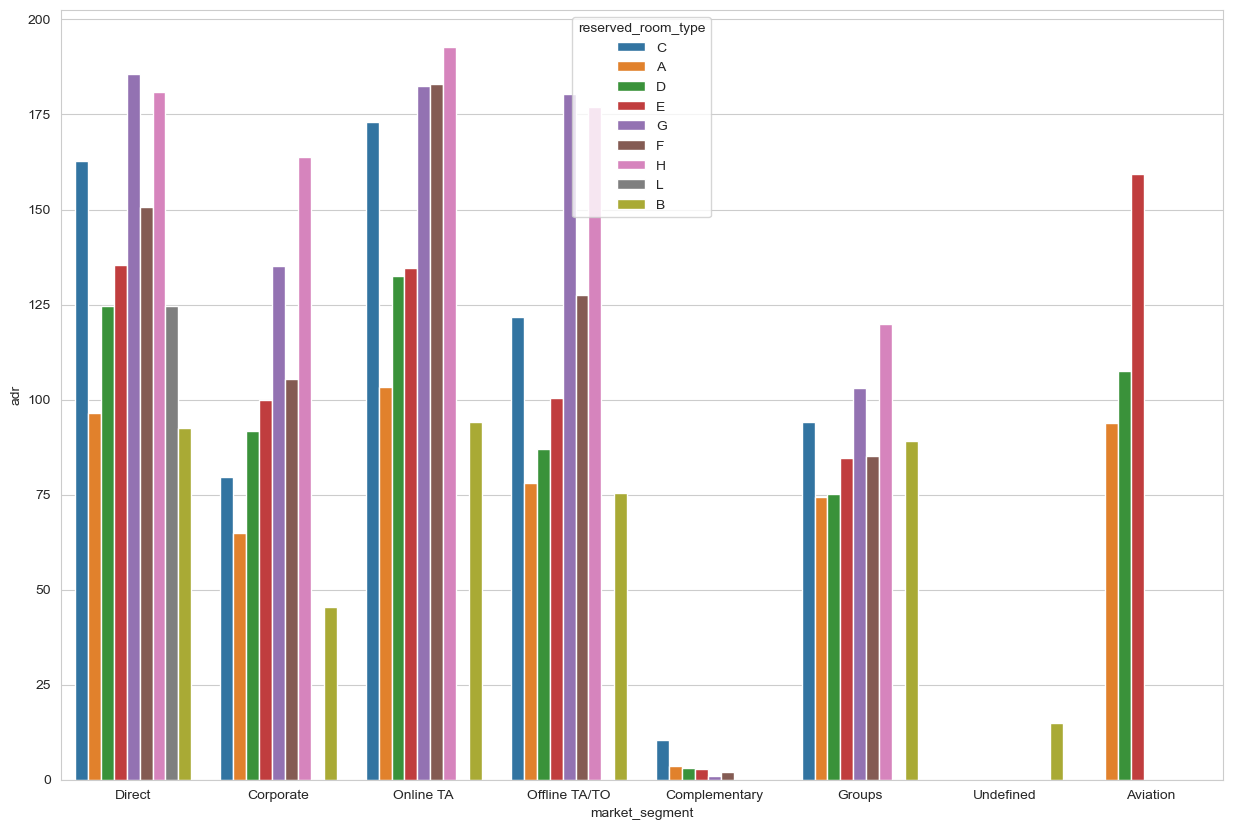

In [66]:
# Avg daily rate of the rooms
# Default estimator of barplot is mean/avg
plt.figure(figsize=(15,10))
sns.barplot(data=hotel_2, x="market_segment", y='adr', hue='reserved_room_type', errorbar=None)
plt.show()

### Total Guests arrival on each day

In [67]:
hotel_2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [68]:
hotel_2[['arrival_date_year','arrival_date_month', 'arrival_date_week_number','arrival_date_day_of_month']]

,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month
0,2015,July,27,1
1,2015,July,27,1
2,2015,July,27,1
3,2015,July,27,1
4,2015,July,27,1
...,...,...,...,...
119385,2017,August,35,30
119386,2017,August,35,31
119387,2017,August,35,31
119388,2017,August,35,31


In [70]:
hotel_2['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [71]:
month_dict = { 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12,
       'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6
}

In [73]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [74]:
hotel_2['arrival_date_month_index'] = hotel_2['arrival_date_month'].map(month_dict)

In [75]:
hotel_2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date',
       'arrival_date_month_index'],
      dtype='object')

In [76]:
hotel_2[['arrival_date_year','arrival_date_month_index','arrival_date_day_of_month']].head()

,arrival_date_year,arrival_date_month_index,arrival_date_day_of_month
0,2015,7,1
1,2015,7,1
2,2015,7,1
3,2015,7,1
4,2015,7,1


In [77]:
# Concat date columns to format to date
hotel_2['arrival_date'] = hotel_2['arrival_date_year'].astype(str) + '-' + hotel_2['arrival_date_month_index'].astype(str) + '-' + hotel_2['arrival_date_day_of_month'].astype(str) 

In [78]:
hotel_2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date',
       'arrival_date_month_index', 'arrival_date'],
      dtype='object')

In [80]:
hotel_2[['adults', 'children', 'babies']]

,adults,children,babies
0,2,0.0,0
1,2,0.0,0
2,1,0.0,0
3,1,0.0,0
4,2,0.0,0
...,...,...,...
119385,2,0.0,0
119386,3,0.0,0
119387,2,0.0,0
119388,2,0.0,0


In [82]:
hotel_2['total_guests'] = hotel_2[['adults', 'children', 'babies']].sum(axis=1)

In [83]:
hotel_2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date',
       'arrival_date_month_index', 'arrival_date', 'total_guests'],
      dtype='object')

In [84]:
hotel_2[['arrival_date', 'total_guests']]

,arrival_date,total_guests
0,2015-7-1,2.0
1,2015-7-1,2.0
2,2015-7-1,1.0
3,2015-7-1,1.0
4,2015-7-1,2.0
...,...,...
119385,2017-8-30,2.0
119386,2017-8-31,3.0
119387,2017-8-31,2.0
119388,2017-8-31,2.0


In [87]:
# Getting guests who did not cancel
hotel_2_notCancel = hotel_2[hotel_2['is_canceled'] == 0]

In [89]:
# Total Guest arrivals of each day
guest_arrivals = hotel_2_notCancel.groupby(['arrival_date'])['total_guests'].sum()

In [90]:
guest_arrivals

arrival_date
2015-10-1     149.0
2015-10-10    167.0
2015-10-11    123.0
2015-10-12    186.0
2015-10-13    115.0
              ...  
2017-8-5      205.0
2017-8-6      199.0
2017-8-7      287.0
2017-8-8      191.0
2017-8-9      185.0
Name: total_guests, Length: 793, dtype: float64

<Axes: xlabel='arrival_date'>

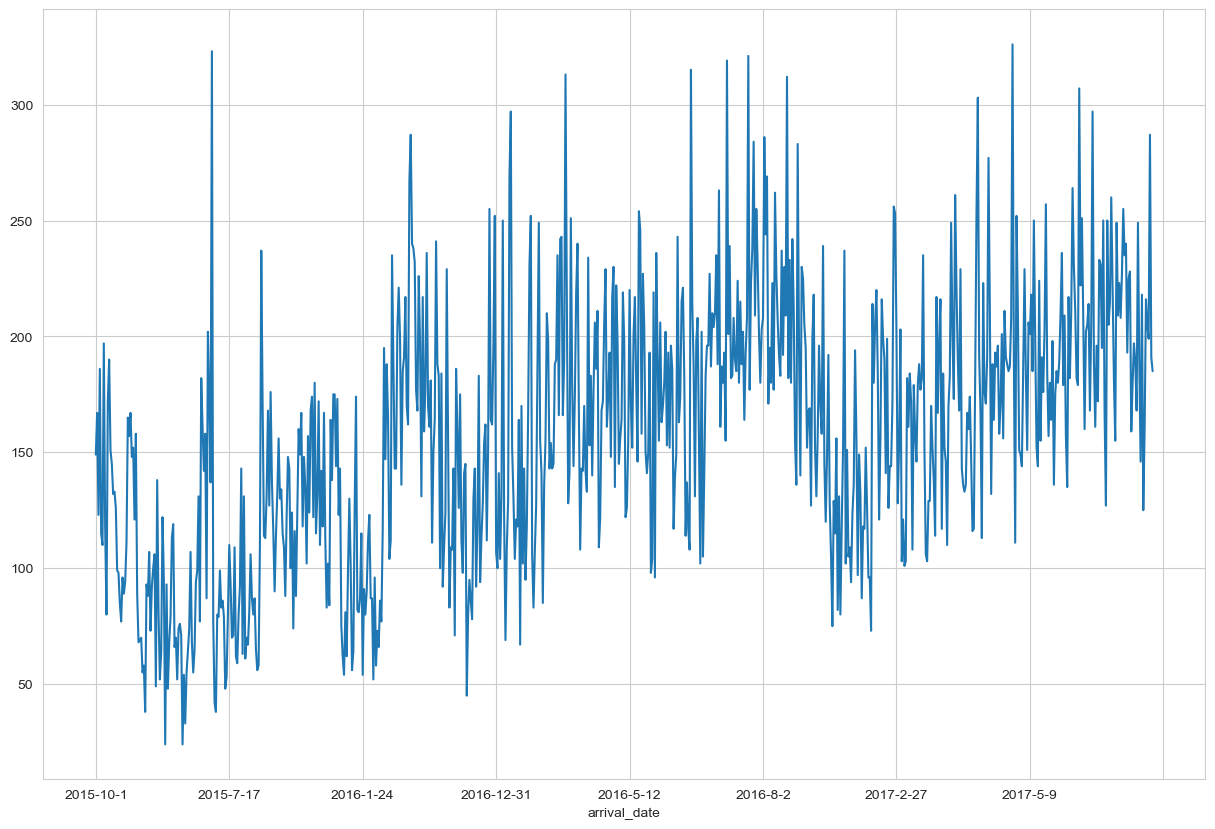

In [92]:
guest_arrivals.plot(figsize=(15,10))

In [93]:
# Analysing distribution of guest arrival

guest_arrivals.values

array([149., 167., 123., 186., 115., 110., 197., 118.,  80., 172., 190.,
       151., 145., 132., 133., 126.,  99.,  98.,  85.,  77.,  96.,  89.,
        94., 111., 165., 157., 167., 148., 152., 121., 158.,  89.,  68.,
        69.,  70.,  55.,  58.,  38.,  93.,  88., 107.,  73.,  92., 100.,
       106.,  49., 138.,  81.,  52.,  64., 122.,  95.,  24.,  93.,  48.,
        68.,  79., 113., 119.,  66.,  70.,  52.,  74.,  76.,  71.,  24.,
        54.,  33.,  55.,  64.,  74., 107.,  68.,  55.,  65.,  94.,  99.,
       131.,  77., 182., 161., 142., 158.,  87., 202., 174., 137., 323.,
        77.,  42.,  38.,  80.,  79.,  99.,  83.,  86.,  79.,  48.,  53.,
        80., 110.,  93.,  70.,  71., 109.,  62.,  59.,  80.,  92., 143.,
        63., 131.,  61.,  70.,  67.,  81., 106.,  87.,  80.,  87.,  65.,
        56.,  58., 111., 237., 171., 114., 113., 131., 168., 127., 176.,
       137., 116.,  90., 114., 132., 156., 130., 134., 115., 109.,  88.,
       122., 148., 143., 100., 124.,  74., 116.,  8

<Axes: ylabel='Density'>

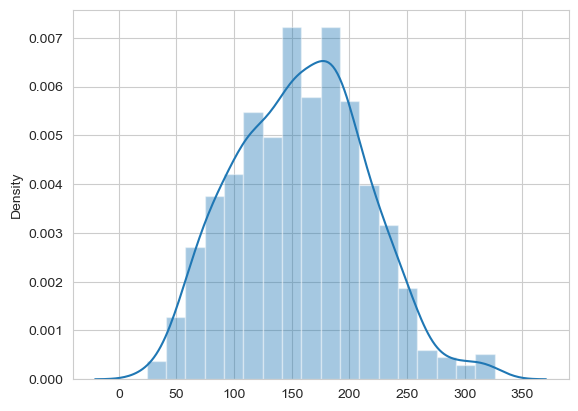

In [96]:
sns.distplot(guest_arrivals.values)

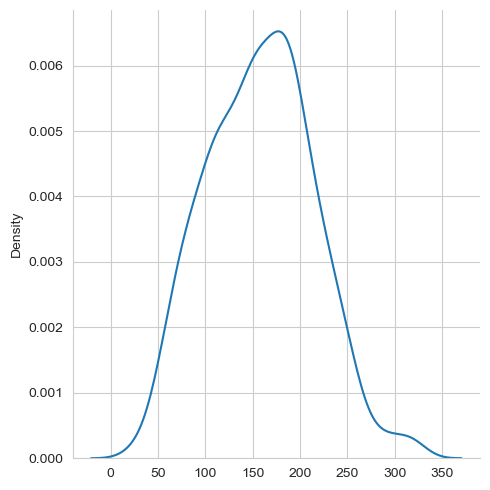

In [97]:
sns.displot(guest_arrivals.values, kind='kde')

In [98]:
np.mean(guest_arrivals.values)

157.92559899117276

In [101]:
np.median(guest_arrivals.values)

158.0

In [102]:
np.std(guest_arrivals.values)

56.48263702610786